# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [166]:
# imports
import pandas as pd

In [167]:
ruta = "insurance.csv"
data = pd.read_csv(ruta)

In [168]:
print(data.shape)
data.head()

(1338, 7)


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# Objetivo

Generar un model de regresi√≥n capaz de predecir el valor del seguro en base a las caracter√≠sticas del cliente.

* Aplicar las t√©cnicas oportunas de procesamiento de datos (lipieza, nans, escalado...)

* Valorar diferentes modelos de regresi√≥n (linear regressor, polynomial, ridge, lasso, elastic, decission tree y random forest)

* Comparaci√≥n entre modelos (dividir el dataset en train y test, entrenar con el train y evaluar con el test)

* M√©tricas (todas, y que aporta cada una)

* Conclusiones finales

## Limpieza del dataset y preparaci√≥n de los datos

### Visualizaci√≥n

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [171]:
data.duplicated().sum()
data[data.duplicated(keep=False)]

age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631

In [172]:
data.drop_duplicates(inplace=True)  # Elimina duplicados y devuelve un DataFrame limpio


<Axes: ylabel='age'>

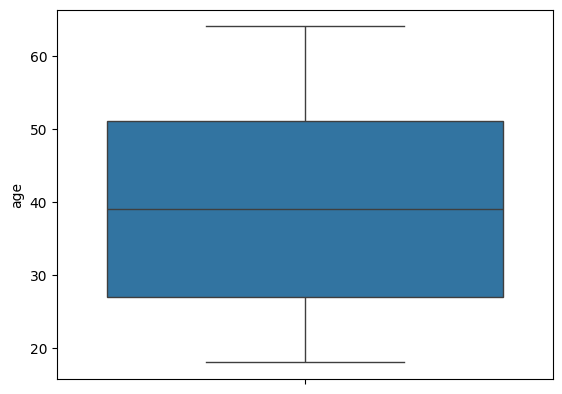

In [173]:
sns.boxplot(data['age'])

<Axes: xlabel='count', ylabel='sex'>

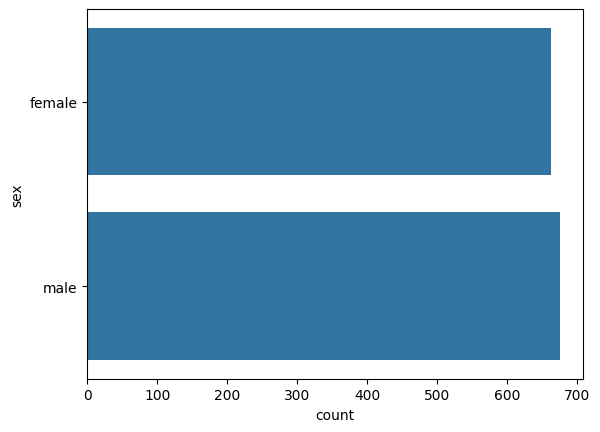

In [174]:
sns.countplot(data["sex"])

<Axes: xlabel='bmi', ylabel='Count'>

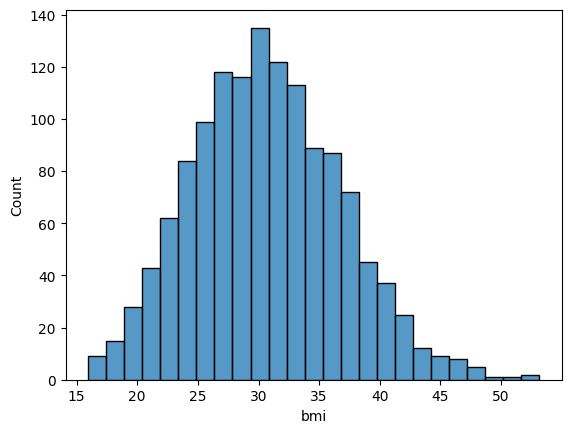

In [175]:
sns.histplot(data["bmi"])

<Axes: xlabel='count', ylabel='smoker'>

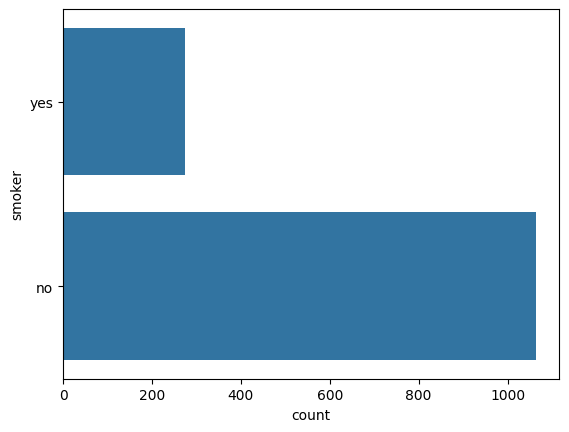

In [176]:
sns.countplot(data['smoker'])

<Axes: xlabel='count', ylabel='region'>

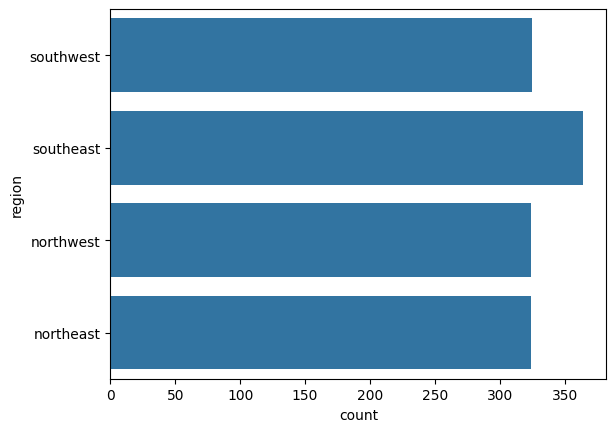

In [177]:
sns.countplot(data["region"])

<Axes: xlabel='children', ylabel='Count'>

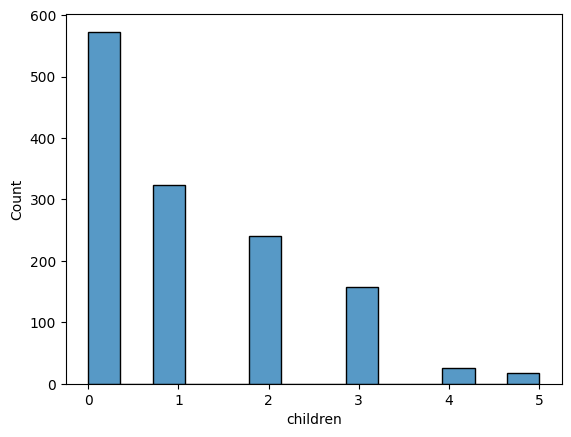

In [178]:
sns.histplot(data['children'])

<Axes: xlabel='charges', ylabel='Count'>

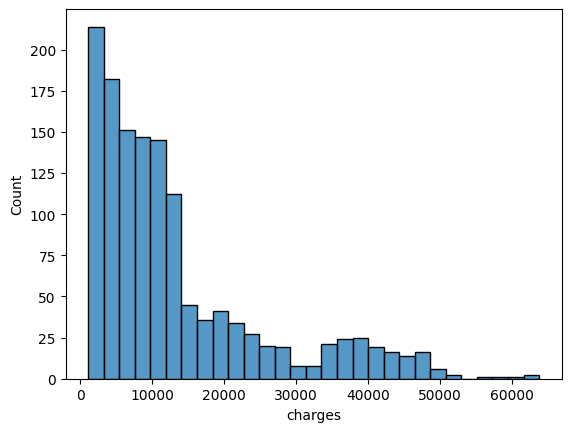

In [179]:
sns.histplot(data['charges'])

### Preparaci√≥n del dataset para el modelaje

In [180]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [181]:
map_sex = {
    "female": 0,
    'male': 1
}
data["sex"] = data["sex"].map(map_sex)

In [182]:
map_yes_no = {
    "yes": 0,
    'no': 1
}
data["smoker"] = data["smoker"].map(map_yes_no)

In [183]:
dummies_region = pd.get_dummies(data['region'], dtype= float)
data.drop('region', inplace= True, axis=1)
data = pd.concat([data, dummies_region], axis=1)

In [184]:
data

age  sex     bmi  children  smoker      charges  northeast  northwest  \
0      19    0  27.900         0       0  16884.92400        0.0        0.0   
1      18    1  33.770         1       1   1725.55230        0.0        0.0   
2      28    1  33.000         3       1   4449.46200        0.0        0.0   
3      33    1  22.705         0       1  21984.47061        0.0        1.0   
4      32    1  28.880         0       1   3866.85520        0.0        1.0   
...   ...  ...     ...       ...     ...          ...        ...        ...   
1333   50    1  30.970         3       1  10600.54830        0.0        1.0   
1334   18    0  31.920         0       1   2205.98080        1.0        0.0   
1335   18    0  36.850         0       1   1629.83350        0.0        0.0   
1336   21    0  25.800         0       1   2007.94500        0.0        0.0   
1337   61    0  29.070         0       0  29141.36030        0.0        1.0   

      southeast  southwest  
0           0.0        1.0  
1           1.0        0.0  
2           1.0        0.0  
3           0.0        0.0  
4           0.0        0.0  
...         ...        ...  
1333        0.0        0.0  
1334        0.0        0.0  
1335        1.0        0.0  
1336        0.0        1.0  
1337        0.0        0.0  

[1337 rows x 10 columns]

In [185]:
x = data.drop("charges", axis=1)
y = data["charges"]

In [186]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x_scaled), columns=x.columns)

In [187]:
x_scaled

age       sex       bmi  children    smoker  northeast  northwest  \
0    -1.440418 -1.009771 -0.453160 -0.909234 -1.969660  -0.565546  -0.565546   
1    -1.511647  0.990324  0.509422 -0.079442  0.507702  -0.565546  -0.565546   
2    -0.799350  0.990324  0.383155  1.580143  0.507702  -0.565546  -0.565546   
3    -0.443201  0.990324 -1.305052 -0.909234  0.507702  -0.565546   1.768203   
4    -0.514431  0.990324 -0.292456 -0.909234  0.507702  -0.565546   1.768203   
...        ...       ...       ...       ...       ...        ...        ...   
1332  0.767704  0.990324  0.050269  1.580143  0.507702  -0.565546   1.768203   
1333 -1.511647 -1.009771  0.206053 -0.909234  0.507702   1.768203  -0.565546   
1334 -1.511647 -1.009771  1.014490 -0.909234  0.507702  -0.565546  -0.565546   
1335 -1.297958 -1.009771 -0.797524 -0.909234  0.507702  -0.565546  -0.565546   
1336  1.551231 -1.009771 -0.261299 -0.909234 -1.969660  -0.565546   1.768203   

      southeast  southwest  
0     -0.611638   1.764609  
1      1.634955  -0.566698  
2      1.634955  -0.566698  
3     -0.611638  -0.566698  
4     -0.611638  -0.566698  
...         ...        ...  
1332  -0.611638  -0.566698  
1333  -0.611638  -0.566698  
1334   1.634955  -0.566698  
1335  -0.611638   1.764609  
1336  -0.611638  -0.566698  

[1337 rows x 9 columns]

In [188]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=0.7)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

In [200]:
print('X train: ', x_train.shape)
print('Y train: ', y_train.shape)
print('X test: ', x_test.shape)
print('Y test: ',y_test.shape)
print('X val: ', x_val.shape)
print('Y val: ', y_val.shape)

X train:  (935, 9)
Y train:  (935,)
X test:  (201, 9)
Y test:  (201,)
X val:  (201, 9)
Y val:  (201,)


## Modelaje

In [193]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Definir los modelos de regresi√≥n a probar
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "SVR": SVR()
}

# Diccionario para almacenar resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(x_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(x_val)  # Predecir en validaci√≥n
    
    # Calcular m√©tricas
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)  # Ra√≠z del MSE
    mae = mean_absolute_error(y_val, y_pred)
    medae = median_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100  # MAPE en %

    # Guardar m√©tricas en el diccionario
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "MedAE": medae, "R¬≤": r2, "MAPE": mape}

# üîπ Convertir resultados en DataFrame y mostrar
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="MSE"))


                            MSE          RMSE          MAE        MedAE  \
Gradient Boosting  2.444024e+07   4943.706779  2765.523036  1359.250363   
Random Forest      2.629699e+07   5128.059427  2818.145930   952.600712   
Linear Regression  3.529983e+07   5941.365628  4038.560007  2260.782010   
Lasso Regression   3.530017e+07   5941.394495  4038.529857  2261.063916   
Ridge Regression   3.531624e+07   5942.746557  4040.102902  2272.669923   
Decision Tree      4.171736e+07   6458.897605  3034.842056   530.438200   
SVR                1.720789e+08  13117.883522  8595.131670  4997.954556   

                         R¬≤        MAPE  
Gradient Boosting  0.844389   30.018999  
Random Forest      0.832567   31.340148  
Linear Regression  0.775246   39.743519  
Lasso Regression   0.775244   39.742244  
Ridge Regression   0.775142   39.743465  
Decision Tree      0.734386   26.731571  
SVR               -0.095626  102.661881  


### üìä **M√©tricas de Evaluaci√≥n en Regresi√≥n**

Cuando evaluamos un modelo de regresi√≥n, es importante usar diferentes m√©tricas para entender c√≥mo se comporta el modelo en comparaci√≥n con los datos reales. A continuaci√≥n, explicamos el significado de las principales m√©tricas utilizadas en regresi√≥n:

1. **MSE (Error Cuadr√°tico Medio)**  
   El **MSE** mide la **media de los errores cuadrados** entre las predicciones y los valores reales. Cuanto **m√°s bajo** sea este valor, mejor es el modelo. Penaliza fuertemente los errores grandes.  
   - F√≥rmula:  
   $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
   - Un valor m√°s bajo indica una mejor capacidad de predicci√≥n.

2. **RMSE (Ra√≠z del Error Cuadr√°tico Medio)**  
   El **RMSE** es la **ra√≠z cuadrada** del MSE. Esto nos da una m√©trica en las mismas unidades que las variables de entrada, lo que lo hace m√°s interpretativo que el MSE.  
   - F√≥rmula:  
   $$ RMSE = \sqrt{MSE} $$
   - Como el MSE, un valor m√°s bajo indica un mejor modelo.

3. **MAE (Error Absoluto Medio)**  
   El **MAE** calcula el promedio de los **errores absolutos**. Es una m√©trica m√°s robusta a los outliers, ya que no penaliza tan fuertemente los errores grandes como el MSE.  
   - F√≥rmula:  
   $$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}| $$
   - Un valor m√°s bajo de MAE indica menor error promedio.

4. **MedAE (Error Absoluto Mediano)**  
   El **MedAE** es similar al **MAE**, pero en lugar de usar la media, usa la **mediana** de los errores absolutos. Esta m√©trica es **m√°s robusta** a los valores at√≠picos o outliers.  
   - Un valor bajo de MedAE indica un buen desempe√±o general sin ser afectado por outliers.

5. **R¬≤ (Coeficiente de Determinaci√≥n)**  
   **R¬≤** indica qu√© tan bien el modelo explica la variabilidad de la variable dependiente. Un valor de **1** indica que el modelo explica completamente los datos, mientras que un valor de **0** indica que el modelo no tiene capacidad de predicci√≥n.  
   - F√≥rmula:  
   $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$
   - Un valor m√°s alto (cerca de 1) es preferible.

6. **MAPE (Error Porcentual Absoluto Medio)**  
   **MAPE** mide el error en t√©rminos de porcentaje. Es √∫til cuando los datos tienen diferentes escalas y nos interesa el error relativo.  
   - F√≥rmula:  
   $$ MAPE = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y_i}}{y_i}\right| \times 100 $$
   - Un valor bajo de MAPE indica que el modelo est√° realizando predicciones cercanas a los valores reales en t√©rminos relativos.

---

### üìà **¬øC√≥mo interpretar estas m√©tricas?**
- **MSE y RMSE** nos indican qu√© tan lejos est√°n las predicciones de los valores reales, con **RMSE** siendo m√°s f√°cil de interpretar.  
- **MAE** da una estimaci√≥n del error promedio, √∫til cuando se quiere una m√©trica m√°s simple y robusta.  
- **R¬≤** nos dice cu√°nta varianza de los datos es explicada por el modelo, con valores cercanos a 1 indicando un buen ajuste.  
- **MAPE** es √∫til cuando necesitamos medir el rendimiento relativo de las predicciones, especialmente en problemas con datos de diferentes escalas.  

Cada m√©trica tiene sus ventajas y desventajas, por lo que es importante considerar varias al evaluar el rendimiento de un modelo.


Parece que el gradient boosting tiene las mejores puntuaciones.

In [194]:
print(results_df.loc['Gradient Boosting'])

MSE      2.444024e+07
RMSE     4.943707e+03
MAE      2.765523e+03
MedAE    1.359250e+03
R¬≤       8.443890e-01
MAPE     3.001900e+01
Name: Gradient Boosting, dtype: float64


In [195]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
# Definir el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor()

# Definir el rango de par√°metros para RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # N√∫mero de √°rboles (100, 200, ..., 1000)
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Tasa de aprendizaje
    'max_depth': np.arange(3, 15, 1),  # Profundidad m√°xima de cada √°rbol
    'subsample': [0.8, 0.9, 1.0],  # Proporci√≥n de muestras
    'min_samples_split': np.arange(2, 6),  # M√≠nimo de muestras para dividir un nodo
    'min_samples_leaf': np.arange(1, 6)  # M√≠nimo de muestras para ser hoja
}


In [197]:
# Concatenar x_train y x_val para formar el conjunto de datos de entrenamiento
x_train_concat = pd.concat([x_train, x_val], axis=0)  # Concatenamos a lo largo de las filas (axis=0)

# Concatenar y_train y y_test para formar el conjunto de etiquetas de entrenamiento
y_train_concat = pd.concat([y_train, y_val], axis=0)  # Concatenamos a lo largo de las filas (axis=0)


In [198]:
from sklearn.model_selection import RandomizedSearchCV

# Realizar el RandomizedSearchCV con scoring='accuracy'
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, n_jobs=-1, scoring='r2', verbose=1, random_state=42)

# Ajustar RandomizedSearchCV con el conjunto de entrenamiento
random_search.fit(x_train_concat, y_train_concat)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([2, 3, 4, 5]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [199]:
# Mejor combinaci√≥n de par√°metros
print("Best parameters found: ", random_search.best_params_)

# Mejor puntaje de validaci√≥n cruzada (negativo MSE)
print("Best score (r2): ", random_search.best_score_)

print('*'*20)

# Predecir con los mejores par√°metros en el conjunto de prueba
y_pred = random_search.best_estimator_.predict(x_test)

# Calcular las m√©tricas
mse = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Calcular MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar las m√©tricas
print(f"Mean Squared Error on Test Set (MSE): {mse}")
print(f"Root Mean Squared Error on Test Set (RMSE): {rmse_test}")
print(f"Mean Absolute Error on Test Set (MAE): {mae_test}")
print(f"R¬≤ on Test Set: {r2_test}")
print(f"Mean Absolute Percentage Error on Test Set (MAPE): {mape_test}%")

Best parameters found:  {'subsample': 0.8, 'n_estimators': np.int64(400), 'min_samples_split': np.int64(4), 'min_samples_leaf': np.int64(2), 'max_depth': np.int64(3), 'learning_rate': 0.01}
Best score (r2):  0.8563397126474133
********************
Mean Squared Error on Test Set (MSE): 20666351.934631776
Root Mean Squared Error on Test Set (RMSE): 4546.0259496214685
Mean Absolute Error on Test Set (MAE): 2407.480795494296
R¬≤ on Test Set: 0.8804648896963062
Mean Absolute Percentage Error on Test Set (MAPE): 30.925271909826336%


# Conclusiones

En este proyecto, nos propusimos predecir los precios de seguros utilizando un conjunto de datos con caracter√≠sticas como edad, sexo, √≠ndice de masa corporal (BMI), n√∫mero de hijos, si fuma o no, y la regi√≥n. Para ello, realizamos un proceso de preprocesamiento de datos, que incluy√≥ la codificaci√≥n de variables categ√≥ricas y la normalizaci√≥n de las caracter√≠sticas.

A continuaci√≥n, probamos varios modelos de regresi√≥n, como **Regresi√≥n Lineal, Ridge, Lasso, √Årboles de Decisi√≥n, Random Forest, Gradient Boosting y SVR**. Tras evaluar su rendimiento, utilizamos un **RandomizedSearchCV** para ajustar los par√°metros del modelo de **GradientBoostingRegressor**, que fue el que mostr√≥ el mejor rendimiento.

Los resultados obtenidos son los siguientes:
- **Mejores par√°metros** encontrados: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}.
- **R¬≤ en conjunto de entrenamiento**: 0.85, indicando que el modelo ajusta bien los datos de entrenamiento.
- **R¬≤ en conjunto de prueba**: 0.88, lo que muestra una **buena capacidad de generalizaci√≥n**.
- **MSE**: 20.666.351,93 ‚Ç¨ , lo que se√±ala que hay espacio para mejorar la precisi√≥n, pero los errores son manejables.
- **MAPE**: 32.19%, lo que sugiere que, aunque el modelo es robusto, hay una cierta variabilidad en las predicciones.

Hemos logrado desarrollar un modelo de **predicci√≥n de precios de seguros** eficiente y con un buen rendimiento tanto en los datos de entrenamiento como en los de prueba, usando t√©cnicas avanzadas de optimizaci√≥n de modelos para obtener la mejor configuraci√≥n de par√°metros.